### Tensorflow keras

* "y" es números enteros (indices de clase: 0, 1, 2, 3,...): SperseCategoricalCrossentropy
* encoding de la salida OneHot: CategoricalCrossEntropy

In [6]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np 
import numpy
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [7]:
X, y = make_classification(
    n_samples=5000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=3,
    weights=[1/3]*3, # 3 clases balanceadas
    random_state=42
)

df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(1, 21)])
df["class"] = 1
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,class
0,0.577910,-1.175159,3.182231,0.404955,-0.613865,-1.039464,-0.239075,-2.836809,-8.026848,-9.041112,...,-3.014423,-0.923978,1.094650,0.711980,1.824328,2.145572,0.051517,-3.797374,1.102314,1
1,-3.256100,0.919359,1.291473,0.030575,1.660010,-0.552647,0.659944,-1.471791,0.089973,-0.870679,...,-3.269361,0.624425,0.528576,-2.705067,0.700740,-2.075426,-1.278485,0.824840,-0.712165,1
2,0.263308,-1.464582,1.580419,0.452207,0.693424,-0.664855,-2.134743,-3.664896,-3.941314,-4.077946,...,-2.652247,0.734020,-0.504239,-1.229404,1.276939,0.018643,-1.459663,-2.030924,-2.562835,1
3,2.327166,2.972473,2.546896,-0.887235,0.763177,2.039143,-1.942751,-0.079054,4.994518,-3.459207,...,-4.096714,2.801948,-0.499836,0.922420,0.170235,2.051526,1.737861,1.805639,2.357027,1
4,0.047870,0.033218,-1.179213,0.779208,1.454919,2.839628,1.145734,2.988370,6.476426,8.485573,...,1.315190,0.065581,1.876118,-0.038665,-2.712738,0.374466,-0.720040,0.809654,-2.902803,1


In [8]:
X = df.drop("class", axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
# aplicar one hot encoder a las salidas "y" para poder calcular métricas como precision, recall, auc
# precision, recall, auc de keras esperan valores en el formato one hot
import keras


y_train_encoded = keras.utils.to_categorical(y_train, num_classes=3)
y_test_encoded = keras.utils.to_categorical(y_test, num_classes=3)
y_train_encoded[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [10]:
# 0. Random state
keras.backend.clear_session()
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# 1. Arquitectura
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(3, activation="softmax") # capa de salida para clasificación multiclase, mismo número de neuronas que de clases a predecir
])

# 2. Compile
model.compile(
    # loss= keras.losses.SparseCategoricalCrossentropy(),  # si la "y" no está codificada a one-hot y es enteros 0, 1, 2, 3,...
    loss=keras.losses.CategoricalCrossentropy(), # si la "y" ya está codificada a one-hot [0, 0, 1]
    optimizer=keras.optimizers.Adam(),
    metrics=[
        "accuracy", # al escribirlo como texto keras seleccionará el accuracy más idóneo dependiendo de si es clasificación binaria o multiclase
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        keras.metrics.AUC()
        ]
)

# fit
model.fit(X_train, y_train_encoded, validation_split=0.2, epochs=20, verbose=1, batch_size=32)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9432 - auc: 0.9846 - loss: 0.1935 - precision: 0.9596 - recall: 0.9131 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.0037 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 0.0024 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.0014 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 9.1787e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 6.9345e-04 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 4.4912e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 4.0097e-04 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/20
100/

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (32, 64)               │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,099 (66.80 KB)

 Trainable params: 5,699 (22.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,400 (44.54 KB)

In [12]:
df_history = pd.DataFrame(model.history.history)
df_history.head()

,accuracy,auc,loss,precision,recall,val_accuracy,val_auc,val_loss,val_precision,val_recall
0,0.986875,0.999633,0.060597,0.992079,0.978437,1.0,1.0,0.003744,1.0,1.0
1,1.000000,1.000000,0.001783,1.000000,1.000000,1.0,1.0,0.001414,1.0,1.0
2,1.000000,1.000000,0.000710,1.000000,1.000000,1.0,1.0,0.000693,1.0,1.0
3,1.000000,1.000000,0.000355,1.000000,1.000000,1.0,1.0,0.000401,1.0,1.0
4,1.000000,1.000000,0.000207,1.000000,1.000000,1.0,1.0,0.000260,1.0,1.0


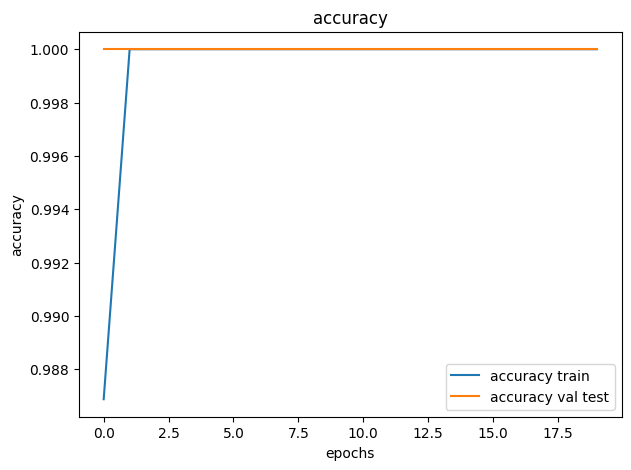

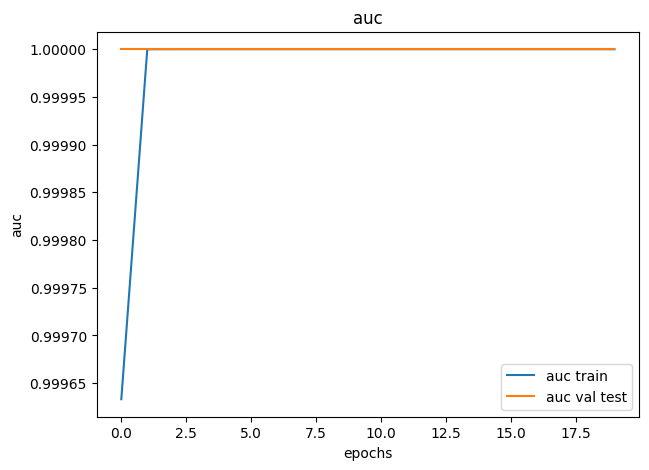

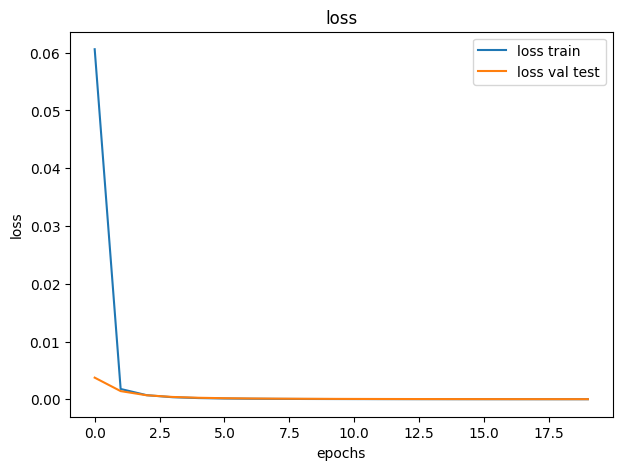

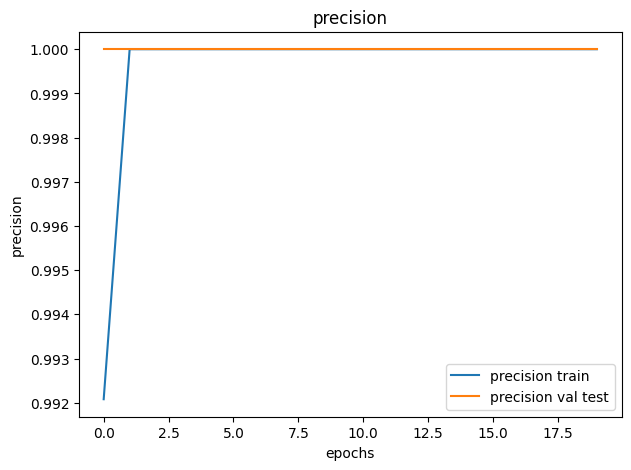

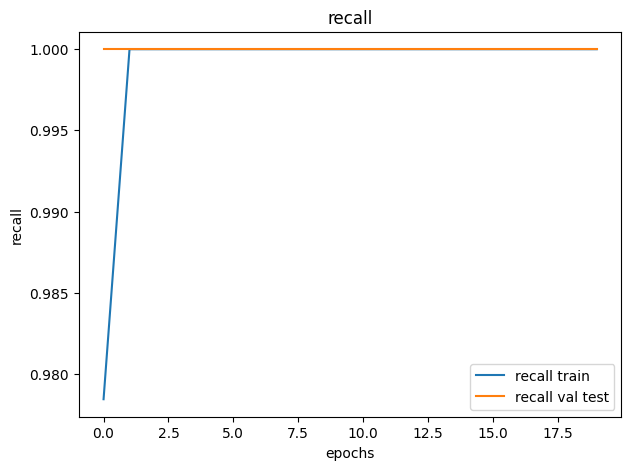

In [13]:
def plot_history(df_history): # Función genérica
    '''
    Dado un DataFrame con el history de entrenamiendo de una red (model.history.history)
    genera gráficas de todas las métricas disponibles. Muestra un gráfico por cada par de métricas ejemplo: 
    * loss y val_loss
    * mean_absolute_error y val_mean_absolute_error
    '''
    train_metrics = [col for col in df_history.columns if not col.startswith('val_')]
    for metric in train_metrics:
        plt.figure(figsize=(7, 5))
        plt.plot(df_history[metric], label=f'{metric} train')
        
        val_metric = f'val_{metric}'
        if val_metric in df_history.columns:
            plt.plot(df_history[val_metric], label=f'{metric} val test')
            
        plt.title(metric)
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        plt.show()
        
plot_history(df_history)

* Disminución inicial de ambas pérdidas(loss, val_loss):
    * El modelo está aprendiendo correctamente.
    * Lo ideal es que vayan a la par

Cosas que pueden ocurrir:
* A partir de un epoch el loss y val_loss ya no mejoran, ya no hay más aprendizaje, no se logra mejorar más por lo que es mejor cortar ya los epochs.

* El val_loss empieza a aumentar a partir de un determinado epoch. Esto sugiere overfitting el modelo está memorizando en lugar de generalizar, se aprende demasiado los datos de train, por lo que luego los datos d test no es capaz de predecirlos bien. Lo ideal es cortar en el epoch donde val_loss alcanza su mínimo.

* Picos puede deberse a muchas cosas:
    * Learning_rate alto podría ocasionar ajustes grandes generando inestabilidad
    * Regularización: si no hay regularización puede haber overfitting e inestabilidad. Solución: capas Dropout
    * Cambios en los datos de validación: validation_split se extrae de forma aleatoria en cada epoch, eso significa que cada epoch se toman ejemlos diferentes. Si los datos son ficticios o raros eso puede dar lugar a picos.

In [14]:
test_loss_bce, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(X_test, y_test_encoded)
print("test_loss_bce", test_loss_bce)
print("test_accuracy", test_accuracy)
print("test_precision", test_precision)
print("test_recall", test_recall)
print("test_auc", test_auc)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 9.8260e-06 - precision: 1.0000 - recall: 1.0000  
test_loss_bce 1.0160290003113914e-05
test_accuracy 1.0
test_precision 1.0
test_recall 1.0
test_auc 1.0


In [15]:
model.predict(X_test) #matriz de probabilidades [n_samples, n_classes]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[6.2212569e-16, 1.0000000e+00, 1.7625365e-14],
       [1.0615083e-11, 1.0000000e+00, 2.7794187e-11],
       [3.9208889e-10, 1.0000000e+00, 7.8719176e-10],
       ...,
       [2.7938490e-11, 1.0000000e+00, 8.1625532e-13],
       [2.9758071e-11, 1.0000000e+00, 1.8468329e-11],
       [1.0269041e-11, 1.0000000e+00, 8.1280677e-12]], dtype=float32)

In [16]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1) # Devuelve la clase que teine la probabilidad más alta: 0, 1, 2,...
y_pred_labels[:10]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
df_comparision = pd.DataFrame({"real": y_test, "prediccion": y_pred_labels})
df_comparision.head()

,real,prediccion
987,1,1
3175,1,1
2709,1,1
1931,1,1
1899,1,1
